In [1]:
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

In [2]:
import torch
print(torch.__version__)

0.3.1.post2


In [3]:
#It's important that you have a working NVidia GPU set up. 
#The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. 
#Therefore, you need to ensure the following line returns True before you proceed. 
#If you have problems with this, please check the FAQ and ask for help on the forums.


In [4]:
#import tensorflow as tf
#tf.test.gpu_device_name()
torch.cuda.is_available()

True

In [5]:
from fastai.learner import *
from fastai.column_data import *

In [6]:
path='../../data/kkbox_music/'
!ls '../../data/kkbox_music/'

kaggle.json		  smallFullDF.csv	  songs.csv.7z
members.csv		  small_train.csv	  test.csv
members.csv.7z		  song_data.zip		  test.csv.7z
models			  song_extra_info.csv	  tmp
sample_submission.csv	  song_extra_info.csv.7z  train.csv
sample_submission.csv.7z  songs.csv		  train.csv.7z


In [7]:
songs = pd.read_csv(path+'songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
songs.shape

(2296320, 7)

In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [10]:
# If there are recurring listening event(s) triggered within a month after the user’s very first
# observable listening event, its target is marked 1, and 0 otherwise in the training set.
train = pd.read_csv(path+'train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [11]:
train.shape

(7377418, 6)

In [12]:
members = pd.read_csv(path+'members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [13]:
members.shape

(34403, 7)

In [14]:
song_extra_info = pd.read_csv(path+'song_extra_info.csv')
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [15]:
song_extra_info.shape

(2295971, 3)

In [16]:
test = pd.read_csv(path+'test.csv')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [17]:
test.shape

(2556790, 6)

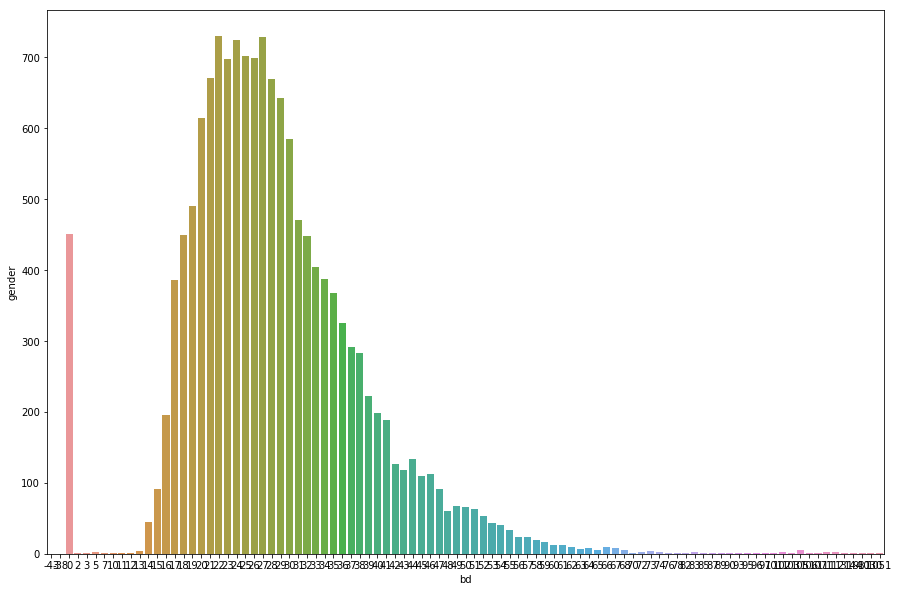

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Here follows the distribution of the members ages. As you can see there are several with age set to 0. 
#That is obsviously something we'll have to manage.

# bd = age
f,axarray = plt.subplots(1,1,figsize=(15,10))
agehist = members.groupby(['bd'],as_index=False).count()
sns.barplot(x=agehist['bd'],y=agehist['gender'])

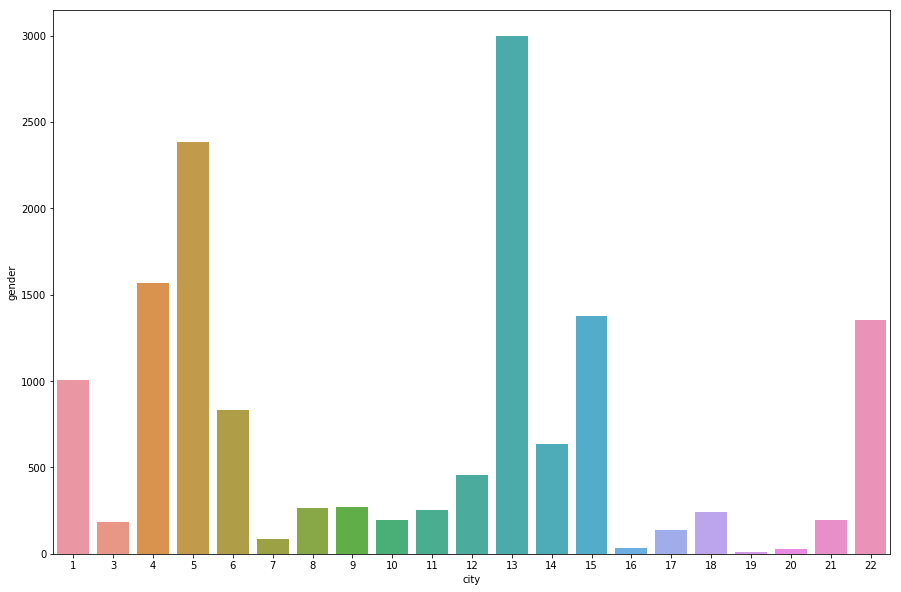

In [19]:
#Members come from 21 different cities identified with an integer index ranging from 1 to 21. 
#Here is the distribution of the members cities.
f,axarray = plt.subplots(1,1,figsize=(15,10))
cityhist = members.groupby(['city'],as_index=False).count()
sns.barplot(x=cityhist['city'],y=cityhist['gender'])

In [20]:
## Songs

print ("There are:",len(songs),"songs;",len(songs['composer'].unique()),
       "composers for",len(songs['genre_ids'].unique()),"genres in",
      len(songs['language'].unique()),"languages")

There are: 2296320 songs; 329824 composers for 1046 genres in 11 languages


In [21]:
#The following returns summarized aggregate information to each table accross each field.
display(DataFrameSummary(train).summary())

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,NaN,NaN,NaN,NaN,NaN,7.37742e+06
mean,NaN,NaN,NaN,NaN,NaN,0.503517
std,NaN,NaN,NaN,NaN,NaN,0.499988
min,NaN,NaN,NaN,NaN,NaN,0
25%,NaN,NaN,NaN,NaN,NaN,0
50%,NaN,NaN,NaN,NaN,NaN,1
75%,NaN,NaN,NaN,NaN,NaN,1
max,NaN,NaN,NaN,NaN,NaN,1
counts,7377418,7377418,7352569,6962614,7355879,7377418
uniques,30755,359966,8,20,12,2


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [23]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [24]:
train['msno'].value_counts()

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    5819
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    5537
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    5511
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    4217
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    4008
hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=    3926
SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=    3733
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    3686
OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=    3239
frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=    3177
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    3133
4tuTIArXO3WO8/zS9y2CC34ywEfChjAKUchlKW00DMM=    3030
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    3027
gxxBbzV3eE2XGjUrFVB2FzAve55Oe1s86HD+OEh36Gw=    2973
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=    2930
jL7ukei/Kb4gDCfTG4+VhV4TzLaDecjji/aW+GqWvac=    2922
y3IT85vrzY2iBxFg6nsh4Cmg+mV3oqR73TPekK7x1Rc=    2895
YU6fAgCFgPkaJ1YSW2838KzGTxmBCfgousTO8jwuHYM=    2883
TxneOykZ/MOIbQmA/aJ4EUQUIR9r+Egt6TNQu0WgwpA=  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a82b4f908>]], dtype=object)

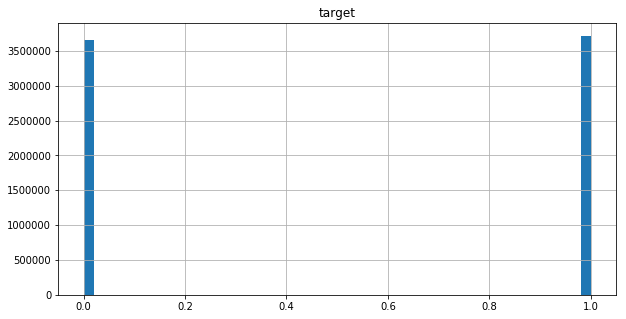

In [25]:
train.hist(bins=50, figsize=(10,5))

In [26]:
display(DataFrameSummary(songs).summary())

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,NaN,2.29632e+06,NaN,NaN,NaN,NaN,2.29632e+06
mean,NaN,246993,NaN,NaN,NaN,NaN,32.378
std,NaN,160920,NaN,NaN,NaN,NaN,24.3324
min,NaN,185,NaN,NaN,NaN,NaN,-1
25%,NaN,183600,NaN,NaN,NaN,NaN,-1
50%,NaN,226627,NaN,NaN,NaN,NaN,52
75%,NaN,277269,NaN,NaN,NaN,NaN,52
max,NaN,1.21738e+07,NaN,NaN,NaN,NaN,59
counts,2296320,2296320,2202204,2296320,1224966,351052,2296319
uniques,2296320,146534,1045,222363,329823,110925,10


In [27]:
display(DataFrameSummary(members).summary())

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,NaN,34403,34403,NaN,34403,34403,34403
mean,NaN,5.37128,12.2809,NaN,5.95338,2.01399e+07,2.0169e+07
std,NaN,6.24393,18.1703,NaN,2.28753,29540.1,7320.92
min,NaN,1,-43,NaN,3,2.00403e+07,1.97001e+07
25%,NaN,1,0,NaN,4,2.0121e+07,2.01702e+07
50%,NaN,1,0,NaN,7,2.01509e+07,2.01709e+07
75%,NaN,10,25,NaN,9,2.01611e+07,2.01709e+07
max,NaN,22,1051,NaN,16,2.01702e+07,2.0201e+07
counts,34403,34403,34403,14501,34403,34403,34403
uniques,34403,21,95,2,6,3862,1484


# Reducing Train data set for quick evaluation
## from 7.3 mln to 30K

In [28]:
smallTrain = train.head(n=30000)
smallTrain.to_csv(path+'small_train.csv',encoding='utf-8')
train.shape, smallTrain.shape

((7377418, 6), (30000, 6))

In [29]:
#create a crosstab
g=smallTrain.groupby('msno')['target'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=smallTrain.groupby('song_id')['target'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = smallTrain.join(topUsers, rsuffix='_r', how='inner', on='msno')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='song_id')

pd.crosstab(top_r.msno, top_r.song_id, top_r.target, aggfunc=np.sum)

song_id,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,L6w2d0w84FjTvFr+BhMfgu7dZAsGiOqUGmvvxIG3gvQ=,OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=,fCCmIa0Y5m+MCGbQga31MOLTIqi7ddgXvkjFPmfslGw=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=
msno,,,,,,,,,,,,,,
7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,0.0,1.0,NaN
DL6KHnEC+t4J4VwoWlKL6wEft1nbWjV2wX2GSs8gGFk=,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H54yhciGEPT4YEfeF80FJscg0nvDifqIIDPLhyY2Lvs=,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
KRMGuUAJmY6wHmXjvJSYiIKht24aWw9tKPgcQbufhic=,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N9u0iiKsqZYNdmI12834pcyIc7xkifUUHyrb69T0jaU=,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


# Fast.ai Collaborative filtering

In [30]:
#??CollabFilterDataset

In [31]:
val_idxs = get_cv_idxs(len(smallTrain))
wd=2e-4
n_factors = 50

In [32]:
cf = CollabFilterDataset.from_csv(path, 'small_train.csv', 'msno', 'song_id', 'target')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [33]:
# loss in plain MSE
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                
    0      0.208563   0.207481  
    1      0.183936   0.184661                                
    2      0.175783   0.183319                                



[array([0.18332])]

In [34]:
preds = learn.predict()
preds

array([0.62815, 0.65998, 0.57031, ..., 0.65354, 0.57876, 0.53328], dtype=float32)

/home/norvilr/anaconda3/envs/fastai07/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


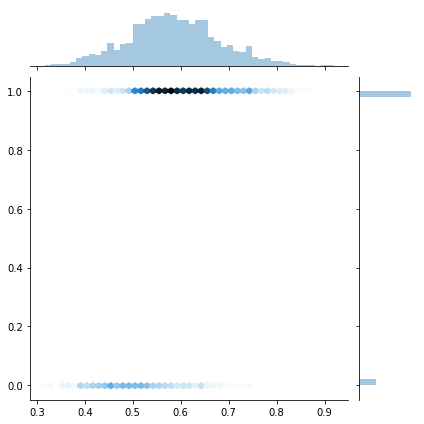

In [35]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

## Create the complete dataset by merging train, members and songs dataframes

In [36]:
FullDF = train.merge(members,how='inner',on='msno')
FullDF.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005


In [37]:
FullDF = FullDF.merge(songs,how='inner',on='song_id')
FullDF.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,20151220,20170930,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,20120804,20171004,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,20110808,20170917,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,20070323,20170915,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [38]:
train.shape, FullDF.shape

((7377418, 6), (7377304, 18))

In [39]:
FullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377304 entries, 0 to 7377303
Data columns (total 18 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
song_length               int64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
dtypes: float64(1), int64(7), object(10)
memory usage: 1.0+ GB


In [40]:
display(DataFrameSummary(FullDF).summary())

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
count,NaN,NaN,NaN,NaN,NaN,7.3773e+06,7.3773e+06,7.3773e+06,NaN,7.3773e+06,7.3773e+06,7.3773e+06,7.3773e+06,NaN,NaN,NaN,NaN,7.37727e+06
mean,NaN,NaN,NaN,NaN,NaN,0.503519,7.51141,17.5393,NaN,6.79407,2.01281e+07,2.01716e+07,245121,NaN,NaN,NaN,NaN,18.6093
std,NaN,NaN,NaN,NaN,NaN,0.499988,6.64163,21.5545,NaN,2.27578,30172.8,3869.84,67344.7,NaN,NaN,NaN,NaN,21.1768
min,NaN,NaN,NaN,NaN,NaN,0,1,-43,NaN,3,2.00403e+07,1.97001e+07,1393,NaN,NaN,NaN,NaN,-1
25%,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,4,2.01107e+07,2.01709e+07,214726,NaN,NaN,NaN,NaN,3
50%,NaN,NaN,NaN,NaN,NaN,1,5,21,NaN,7,2.0131e+07,2.01709e+07,241812,NaN,NaN,NaN,NaN,3
75%,NaN,NaN,NaN,NaN,NaN,1,13,29,NaN,9,2.0151e+07,2.0171e+07,272160,NaN,NaN,NaN,NaN,52
max,NaN,NaN,NaN,NaN,NaN,1,22,1051,NaN,13,2.01701e+07,2.0201e+07,1.08517e+07,NaN,NaN,NaN,NaN,59
counts,7377304,7377304,7352455,6962508,7355765,7377304,7377304,7377304,4415868,7377304,7377304,7377304,7377304,7258963,7377304,5701712,4198620,7377268
uniques,30755,359914,8,20,12,2,21,92,2,5,3811,1395,60266,572,40582,76064,33888,10


In [41]:
smallFullDF = FullDF.head(n=50000)
smallFullDF.to_csv(path+'smallFullDF.csv',encoding='utf-8')

In [42]:
val_idxs = get_cv_idxs(len(smallFullDF))
wd=2e-4
n_factors = 50

In [43]:
# !!! this doesn't work !!!
#cff = CollabFilterDataset.from_csv(path, 'smallFullDF.csv', ['msno','city','bd','gender'], ['song_id','song_length','genre_ids'], 'target')
#learn2 = cff.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)
# loss in plain MSE
#learn2.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

# example using fast.ai ColumnarModelData
## https://towardsdatascience.com/structured-deep-learning-b8ca4138b848

Next we'll fill in missing values to avoid complications with NA's. NA (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary signal value that doesn't otherwise appear in the data.

In [44]:
smallFullDF.genre_ids.head()

0    359
1    359
2    359
3    359
4    359
Name: genre_ids, dtype: object

In [53]:
smallFullDF['city'].value_counts()

1     19099
13     7381
5      5638
4      3566
15     3153
22     2972
6      1669
14     1457
12      897
9       604
8       571
11      565
18      491
10      463
3       438
21      431
17      288
7       165
16       68
20       47
19       37
Name: city, dtype: int64

In [71]:
# for col in smallFullDF.columns:
#     if smallFullDF[col].dtype == object:
#         #print(FullDF[col])
#         smallFullDF[col] = smallFullDF[col].astype('category')
#         #FullDF[col] = le.fit_transform(FullDF[col].astype(str))
#         #FullDF[col] = le.fit_transform(FullDF[col])
#     elif smallFullDF[col].dtype == bool:
#         smallFullDF[col] = smallFullDF[col].astype('category')
#     else:
#         pass

In [48]:
 type(smallFullDF['msno'])

pandas.core.series.Series

In [61]:
smallFullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 9 columns):
msno           50000 non-null object
song_id        50000 non-null object
target         50000 non-null int64
city           50000 non-null int64
bd             50000 non-null int64
gender         50000 non-null object
song_length    50000 non-null int64
genre_ids      50000 non-null object
artist_name    50000 non-null object
dtypes: int64(4), object(5)
memory usage: 5.1+ MB


In [62]:
smallFullDF.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
msno,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,ruQx4VOdTq74CDI1viGqQAIASWrU4soi74t1E3N6KO4=,7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=,z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=,...,FQMnOKhXovFzrL2uJu70X6BbrTXiVOhwdtyg1owHzDc=,7+r4cMEu0iaAJxCj/bQHiWmpioIrqx+wuIJdKbwv/eE=,MxCUQ6tAD7LU1yR0gwRck91ZKE88gY8kD/rX9Hi9srQ=,e3j8rNElP/VhxhqxUT0dIwMWQuoqj089JfzvRm4ZzXs=,iJdSxfvZg6lb6URXw7yrU/Jk6X8RGIcG4jDZZ/TJjJM=,azz6EDnzmoUMbmsHjT5rvwDHZcDLf/VoHDl66Q4UTI0=,UimlG6/9fABujB3OjdMmryMLP+vlB4ki6dZtylz/xyk=,X0junnW7ezz4atY2HhqyhW3Lnm2Z1ro2PSS07ERgwuA=,JoGt+PgRGKHAhTQnaRqQygBWdDwGE6gdPbeGiGP4/Lc=,/WbQ2CAGZodBKX9/L9NteZU8YRtlOTBc4ErHpIVQVpo=
song_id,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,...,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=
target,1,0,1,1,0,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
city,1,15,1,5,6,5,5,22,5,6,...,10,1,4,5,5,1,6,4,1,1
bd,0,18,0,21,33,23,27,0,41,41,...,28,0,18,37,0,0,32,46,0,0
gender,missing,male,missing,female,female,female,female,missing,male,male,...,male,missing,male,missing,missing,missing,female,female,missing,missing
song_length,206471,206471,206471,206471,206471,206471,206471,206471,206471,206471,...,222197,222197,222197,222197,222197,222197,222197,222197,222197,222197
genre_ids,359,359,359,359,359,359,359,359,359,359,...,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609
artist_name,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,...,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris


In [63]:
# fill in unknown NaN values for selected columns
Fillvalues = {'msno': 'missing',
              'song_id': 'missing',
              'genre_ids': 'missing', 
              'artist_name': 'missing', 
              'bd': 0,
              'city':99,
              'song_length':1,
              'gender': 'missing'}
smallFullDF.fillna(value=Fillvalues, inplace=True)

In [89]:
smallFullDF['bd'].value_counts()

0       20979
22       1806
27       1699
25       1691
24       1687
21       1647
23       1634
28       1553
20       1513
26       1502
29       1267
30       1153
19       1135
18       1098
17        940
31        931
33        848
32        831
34        675
35        625
36        505
16        375
38        344
37        339
40        271
41        261
39        256
47        217
42        215
43        205
        ...  
57         27
103        27
60         22
59         19
74         14
10         13
67         12
105        12
64         10
61         10
63          8
72          7
66          6
111         6
83          6
68          5
3           5
11          4
13          3
65          3
90          3
1030        2
82          2
62          2
7           1
73          1
107         1
12          1
112         1
95          1
Name: bd, Length: 75, dtype: int64

In [ ]:
# simplify table be removing unused columns (normally wouldn't do that and use all)
#better option is to do df_small = df2[['id', 'budget', ...]].copy()
smallFullDF.drop('source_system_tab',1,inplace=True)
smallFullDF.drop('source_screen_name',1,inplace=True)
smallFullDF.drop('source_type',1,inplace=True)
smallFullDF.drop('registered_via',1,inplace=True)
smallFullDF.drop('registration_init_time',1,inplace=True)
smallFullDF.drop('expiration_date',1,inplace=True)
smallFullDF.drop('composer',1,inplace=True)
smallFullDF.drop('lyricist',1,inplace=True)
smallFullDF.drop('language',1,inplace=True)

In [65]:
smallFullDF.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
msno,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,ruQx4VOdTq74CDI1viGqQAIASWrU4soi74t1E3N6KO4=,7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=,z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=,...,FQMnOKhXovFzrL2uJu70X6BbrTXiVOhwdtyg1owHzDc=,7+r4cMEu0iaAJxCj/bQHiWmpioIrqx+wuIJdKbwv/eE=,MxCUQ6tAD7LU1yR0gwRck91ZKE88gY8kD/rX9Hi9srQ=,e3j8rNElP/VhxhqxUT0dIwMWQuoqj089JfzvRm4ZzXs=,iJdSxfvZg6lb6URXw7yrU/Jk6X8RGIcG4jDZZ/TJjJM=,azz6EDnzmoUMbmsHjT5rvwDHZcDLf/VoHDl66Q4UTI0=,UimlG6/9fABujB3OjdMmryMLP+vlB4ki6dZtylz/xyk=,X0junnW7ezz4atY2HhqyhW3Lnm2Z1ro2PSS07ERgwuA=,JoGt+PgRGKHAhTQnaRqQygBWdDwGE6gdPbeGiGP4/Lc=,/WbQ2CAGZodBKX9/L9NteZU8YRtlOTBc4ErHpIVQVpo=
song_id,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,...,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=,MtFK4NN8Kv1k/xPA3wb8SQaP/jWee52FAaC1s9NFsU4=
target,1,0,1,1,0,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
city,1,15,1,5,6,5,5,22,5,6,...,10,1,4,5,5,1,6,4,1,1
bd,0,18,0,21,33,23,27,0,41,41,...,28,0,18,37,0,0,32,46,0,0
gender,missing,male,missing,female,female,female,female,missing,male,male,...,male,missing,male,missing,missing,missing,female,female,missing,missing
song_length,206471,206471,206471,206471,206471,206471,206471,206471,206471,206471,...,222197,222197,222197,222197,222197,222197,222197,222197,222197,222197
genre_ids,359,359,359,359,359,359,359,359,359,359,...,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609
artist_name,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,Bastille,...,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris,Calvin Harris


In [66]:
smallFullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 9 columns):
msno           50000 non-null object
song_id        50000 non-null object
target         50000 non-null int64
city           50000 non-null int64
bd             50000 non-null int64
gender         50000 non-null object
song_length    50000 non-null int64
genre_ids      50000 non-null object
artist_name    50000 non-null object
dtypes: int64(4), object(5)
memory usage: 5.1+ MB


In [68]:
#select which vars are continueouis and categorical, and dependant variable 
cat_vars = ['msno', 'song_id', 'city', 'gender', 'genre_ids', 'artist_name']
contin_vars = ['song_length']
dep = 'target'

In [72]:
joined = smallFullDF[cat_vars+contin_vars+[dep]].copy()

In [73]:
joined

,msno,song_id,city,gender,genre_ids,artist_name,song_length,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,missing,359,Bastille,206471,1
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,15,male,359,Bastille,206471,0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,missing,359,Bastille,206471,1
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,5,female,359,Bastille,206471,1
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,6,female,359,Bastille,206471,0
5,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,5,female,359,Bastille,206471,0
6,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,5,female,359,Bastille,206471,1
7,ruQx4VOdTq74CDI1viGqQAIASWrU4soi74t1E3N6KO4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,22,missing,359,Bastille,206471,1
8,7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,5,male,359,Bastille,206471,0
9,z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,6,male,359,Bastille,206471,0


In [74]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [75]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 8 columns):
msno           50000 non-null category
song_id        50000 non-null category
city           50000 non-null category
gender         50000 non-null category
genre_ids      50000 non-null category
artist_name    50000 non-null category
song_length    50000 non-null int64
target         50000 non-null int64
dtypes: category(6), int64(2)
memory usage: 2.2 MB


In [76]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')

In [77]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 8 columns):
msno           50000 non-null category
song_id        50000 non-null category
city           50000 non-null category
gender         50000 non-null category
genre_ids      50000 non-null category
artist_name    50000 non-null category
song_length    50000 non-null float32
target         50000 non-null int64
dtypes: category(6), float32(1), int64(1)
memory usage: 2.0 MB


In [80]:
n = len(joined); n


50000

In [82]:
idxs = get_cv_idxs(n, val_pct=50000/n)
joined_samp = joined.iloc[idxs].set_index("msno")
samp_size = len(joined_samp); samp_size

40000

In [ ]:
# To run on the full dataset, use this instead:
#samp_size = n
#joined_samp = joined.set_index("msno")

In [83]:
joined_samp.head(2)

,song_id,city,gender,genre_ids,artist_name,song_length,target
msno,,,,,,,
IrJbLBY92pHI2yikMhqWj2ESj2bG0wHO391NW1vPUdk=,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,13,male,1609,The Chainsmokers,244976.0,0
8hwiUha0uwVnYNYPxNZAy9DzftbVB5A1tTDxJYGjwbk=,+h+uIXLQyXHuCdwAY5oT3T302vt0IdQJtux0APXhriw=,1,missing,465,Shawn Mendes,187895.0,1


In [85]:
from fastai.structured import *
from fastai.column_data import *

In [86]:
df, y, nas, mapper = proc_df(joined_samp, 'target', do_scale=True)
yl = np.log(y)

/home/norvilr/anaconda3/envs/fastai07/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [100]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))
print(train_size, len(df))
print(val_idx)

30000 40000
[30000, 30001, 30002, 30003, 30004, 30005, 30006, 30007, 30008, 30009, 30010, 30011, 30012, 30013, 30014, 30015, 30016, 30017, 30018, 30019, 30020, 30021, 30022, 30023, 30024, 30025, 30026, 30027, 30028, 30029, 30030, 30031, 30032, 30033, 30034, 30035, 30036, 30037, 30038, 30039, 30040, 30041, 30042, 30043, 30044, 30045, 30046, 30047, 30048, 30049, 30050, 30051, 30052, 30053, 30054, 30055, 30056, 30057, 30058, 30059, 30060, 30061, 30062, 30063, 30064, 30065, 30066, 30067, 30068, 30069, 30070, 30071, 30072, 30073, 30074, 30075, 30076, 30077, 30078, 30079, 30080, 30081, 30082, 30083, 30084, 30085, 30086, 30087, 30088, 30089, 30090, 30091, 30092, 30093, 30094, 30095, 30096, 30097, 30098, 30099, 30100, 30101, 30102, 30103, 30104, 30105, 30106, 30107, 30108, 30109, 30110, 30111, 30112, 30113, 30114, 30115, 30116, 30117, 30118, 30119, 30120, 30121, 30122, 30123, 30124, 30125, 30126, 30127, 30128, 30129, 30130, 30131, 30132, 30133, 30134, 30135, 30136, 30137, 30138, 30139, 30140, 

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [91]:


def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)



In [93]:
#We can create a ModelData object directly from out data frame.
md = ColumnarModelData.from_data_frame(path, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128)

KeyError: "['msno'] not in index"